# Практическое задание: Линейная регрессия и EDA

## Цель задания
В этом практическом задании вам предстоит выполнить полный анализ данных страховой компании, включая:
1. Разведочный анализ данных (EDA)
2. Визуализацию данных
3. Построение и оценку модели линейной регрессии

## Описание данных
Набор данных содержит информацию о страховых взносах и различных характеристиках клиентов:
- age: возраст
- sex: пол
- bmi: индекс массы тела
- children: количество детей
- smoker: статус курильщика
- region: регион проживания
- charges: страховые выплаты (целевая переменная)

## Задачи
1. Загрузка и первичный анализ данных
2. Очистка и предобработка данных
3. Разведочный анализ данных (EDA)
4. Статистический анализ
5. Подготовка признаков
6. Построение модели линейной регрессии
7. Оценка модели
8. Визуализация результатов

## Задание 1: Загрузка и первичный анализ данных

1. Загрузите библиотеки:
   - pandas для работы с данными
   - numpy для математических операций
   - matplotlib и seaborn для визуализации
   - scipy.stats для статистических тестов

2. Загрузите датасет 'insurance.csv'

3. Выполните первичный анализ данных:
   - Проверьте размерность данных
   - Выведите первые 5 строк
   - Проверьте типы данных
   - Проверьте наличие пропущенных значений
   - Выведите основные статистические характеристики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
insurance_data = pd.read_csv('insurance.csv')
print("Размерность данных:", insurance_data.shape)
print("Первые пять строк данных:")
print(insurance_data.head(5))
print("Информация о типах данных:")
print(insurance_data.dtypes)
print("Пропущенные значения:")
print(insurance_data.isnull().sum())
print("Основные статистические характеристики:")
print(insurance_data.describe())

Размерность данных: (1338, 7)
Первые пять строк данных:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Информация о типах данных:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Пропущенные значения:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Основные статистические характеристики:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.0981

## Задание 2: Очистка и предобработка данных

1. Проверьте данные на наличие выбросов:
   - Используйте boxplot для числовых переменных
   - Определите наличие выбросов с помощью IQR
   - Примите решение о методе обработки выбросов

2. Проверьте распределение категориальных переменных:
   - Подсчитайте количество уникальных значений
   - Постройте графики распределения

3. Проведите необходимую предобработку:
   - Обработайте выбросы (если необходимо)
   - Преобразуйте категориальные переменные
   - Сохраните предобработанные данные

Числовые признаки: ['age', 'bmi', 'children', 'charges']


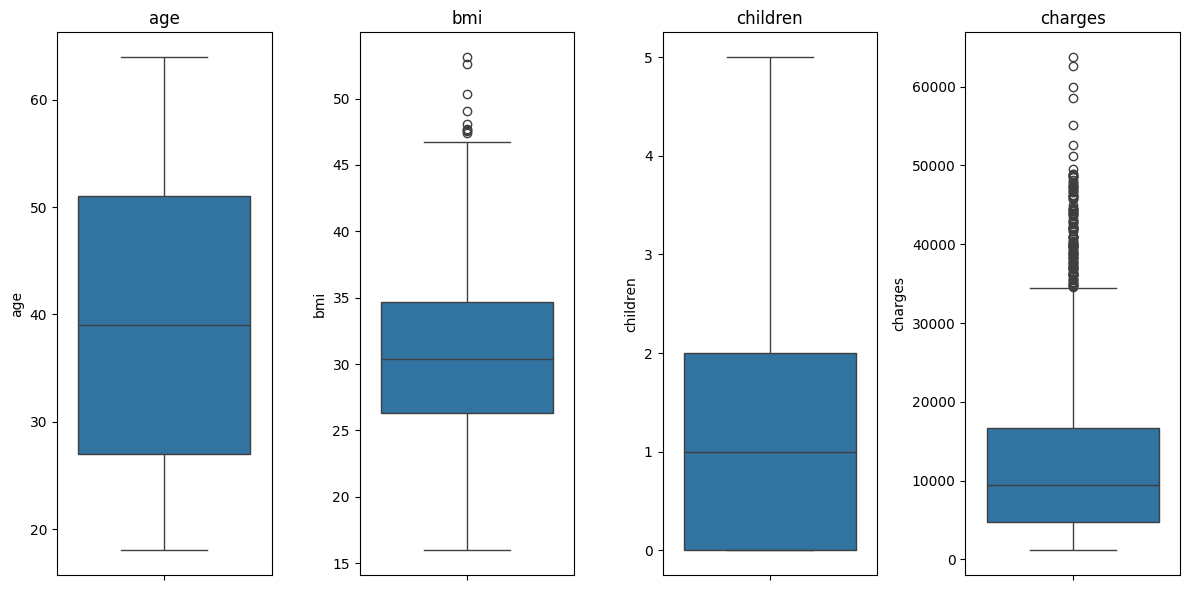

age: 0 выбросов
bmi: 9 выбросов
children: 0 выбросов
charges: 139 выбросов
sex:
sex
male      676
female    662
Name: count, dtype: int64


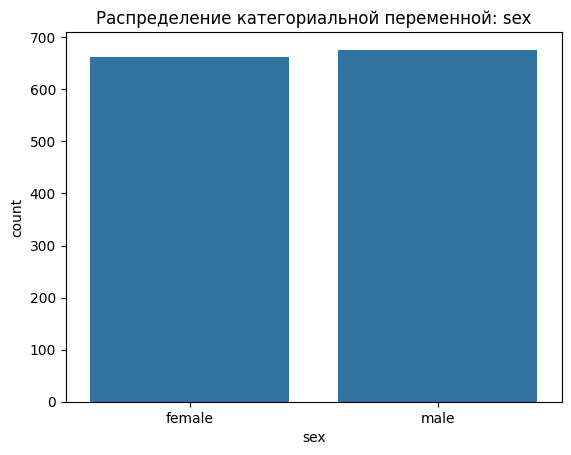

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64


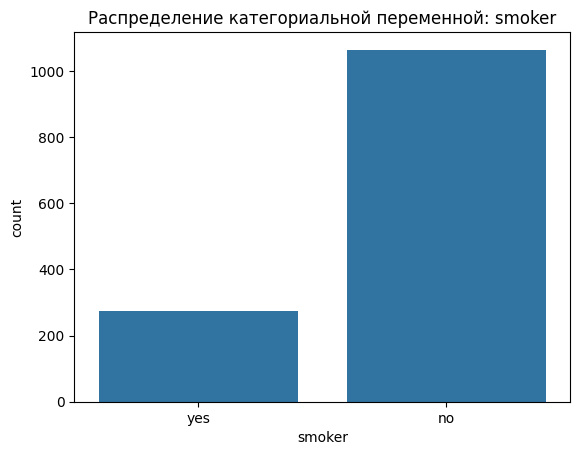

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


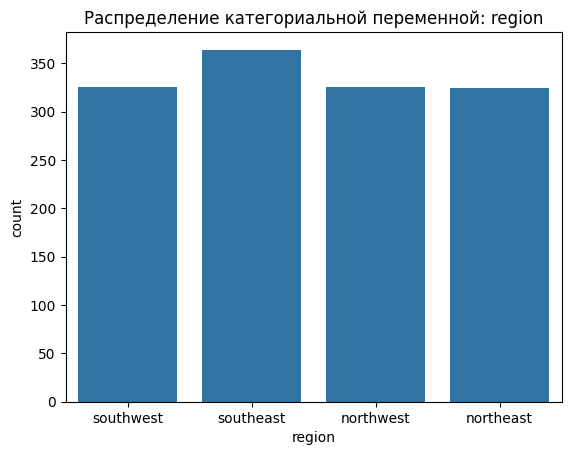


Размерность после кодирования: (1338, 9)
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
✅ Предобработанные данные сохранены в файл 'insurance_preprocessed.csv'


In [2]:
numeric_cols = insurance_data.select_dtypes(include=[np.number]).columns
print("Числовые признаки:", numeric_cols.tolist())

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=insurance_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

for col in numeric_cols:
    outliers = detect_outliers_iqr(insurance_data, col)
    print(f"{col}: {len(outliers)} выбросов")

cat_cols = insurance_data.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col}:")
    print(insurance_data[col].value_counts())
    sns.countplot(data=insurance_data, x=col)
    plt.title(f"Распределение категориальной переменной: {col}")
    plt.show()

insurance_encoded = pd.get_dummies(insurance_data, drop_first=True)


print("\nРазмерность после кодирования:", insurance_encoded.shape)
print(insurance_encoded.head())
insurance_encoded.to_csv('insurance_preprocessed.csv', index=False)
print("✅ Предобработанные данные сохранены в файл 'insurance_preprocessed.csv'")

## Задание 3: Разведочный анализ данных (EDA)

1. Выполните анализ распределений:
   - Постройте гистограммы для числовых переменных
   - Проверьте нормальность распределений с помощью QQ-plots
   - Визуализируйте распределения с помощью KDE plots

2. Исследуйте взаимосвязи между переменными:
   - Постройте корреляционную матрицу
   - Создайте scatter plots для пар числовых переменных
   - Проанализируйте взаимосвязи с помощью box plots для категориальных переменных

3. Проведите анализ целевой переменной (charges):
   - Исследуйте её распределение
   - Проанализируйте зависимости с другими переменными
   - Проверьте наличие нелинейных связей

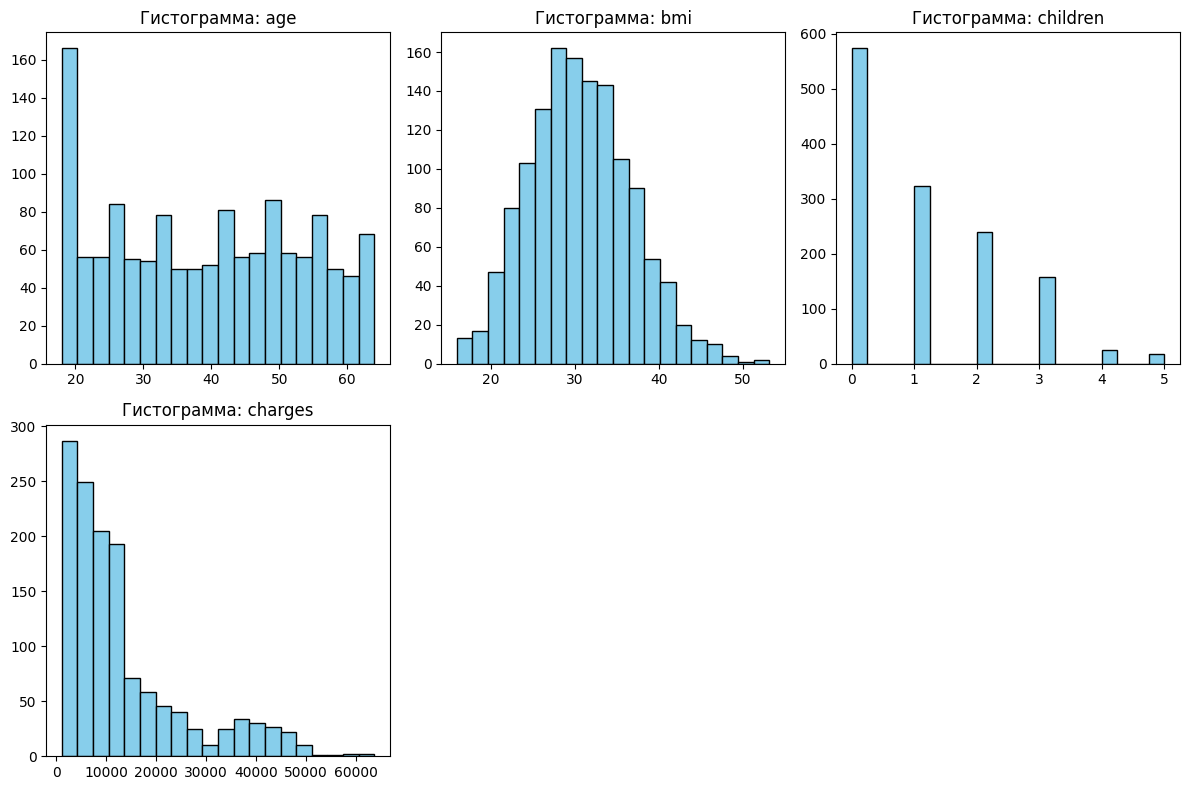

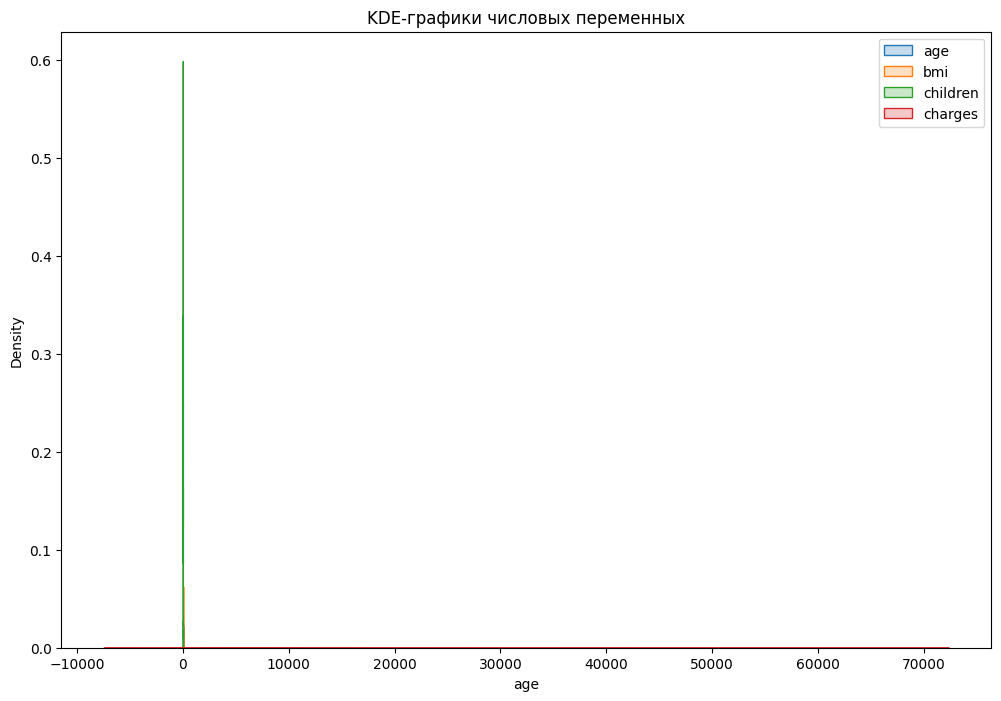

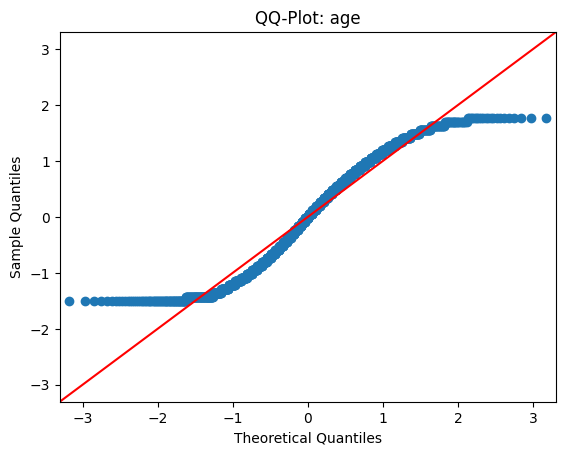

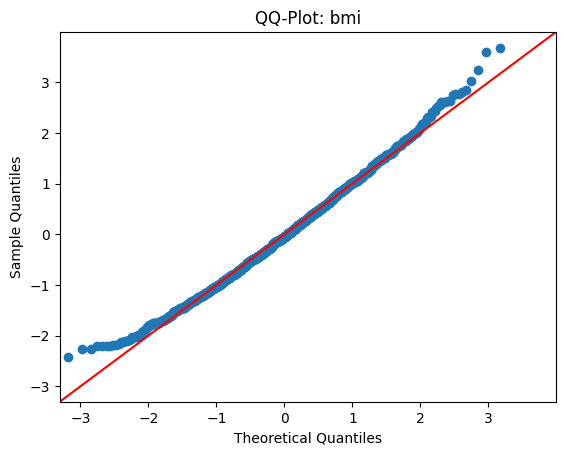

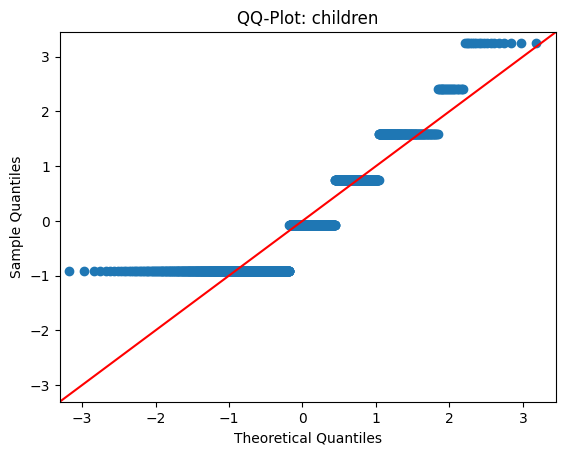

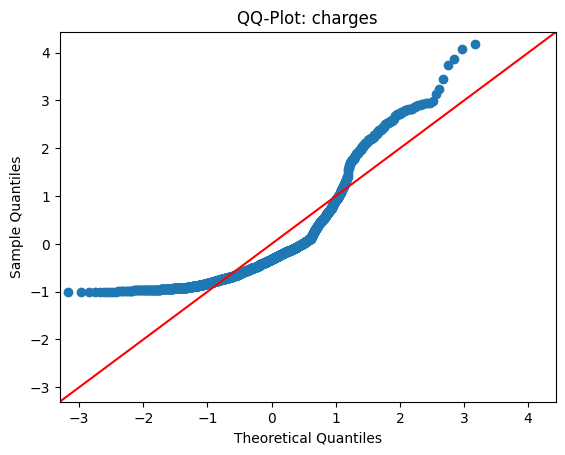

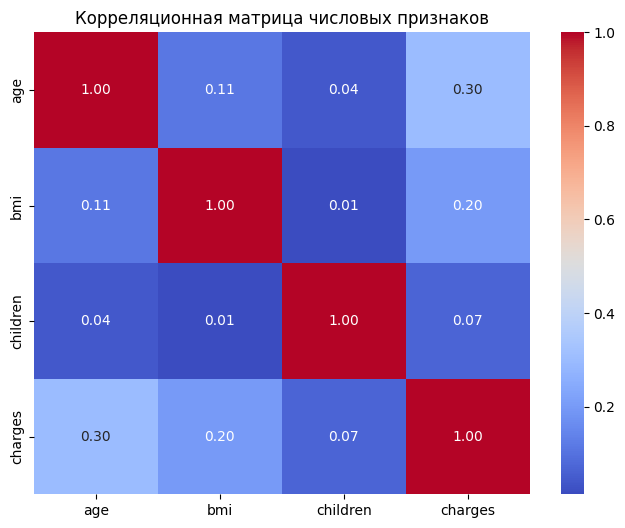

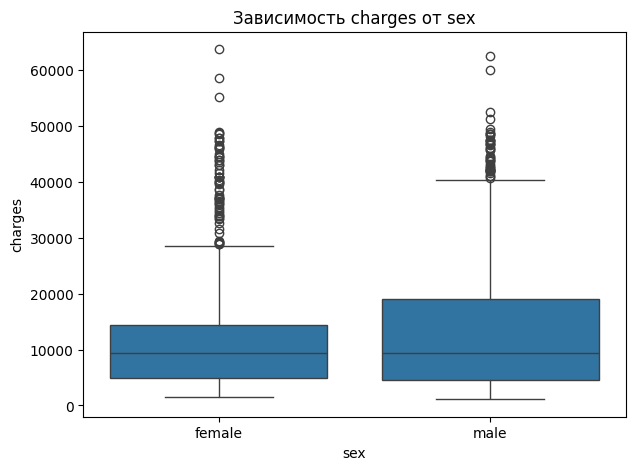

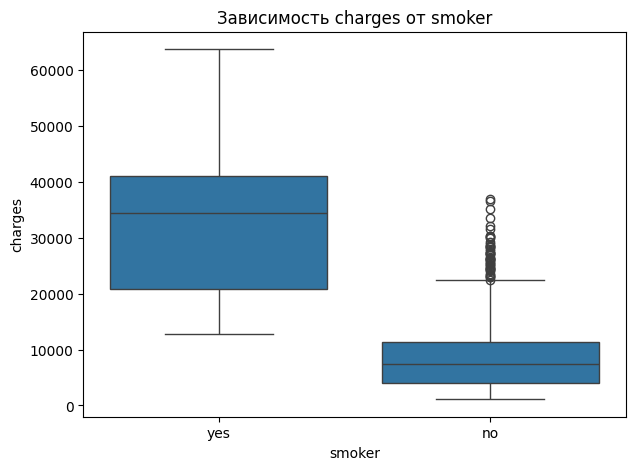

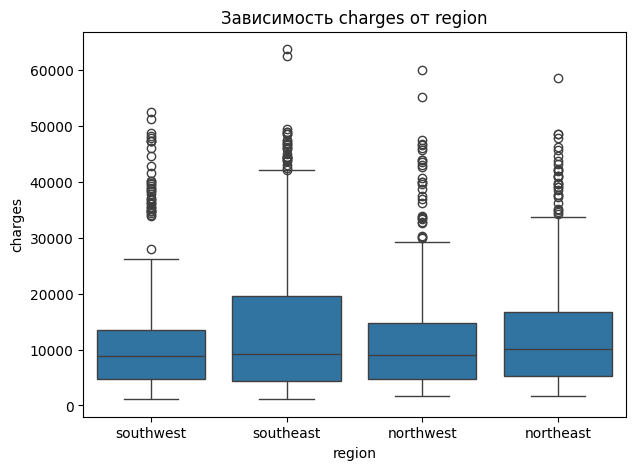

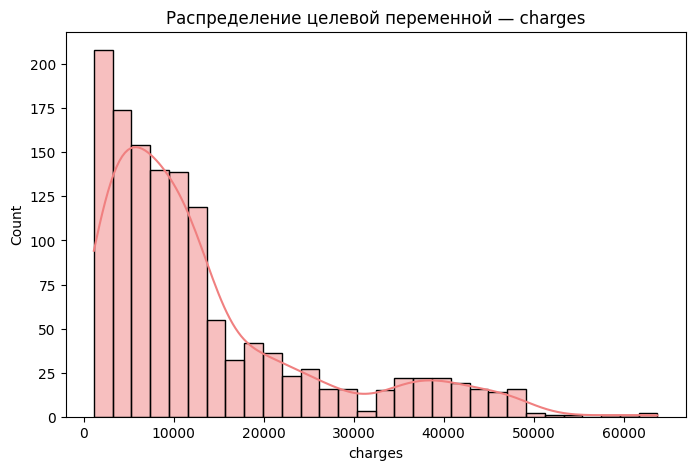


Корреляция с целевой переменной 'charges':
 charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


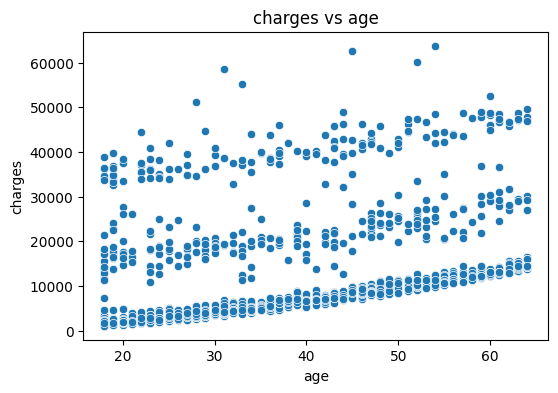

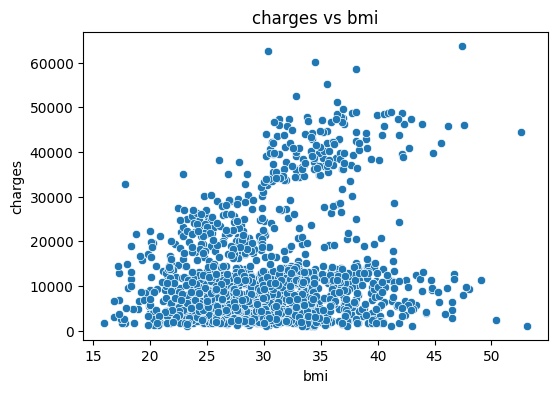

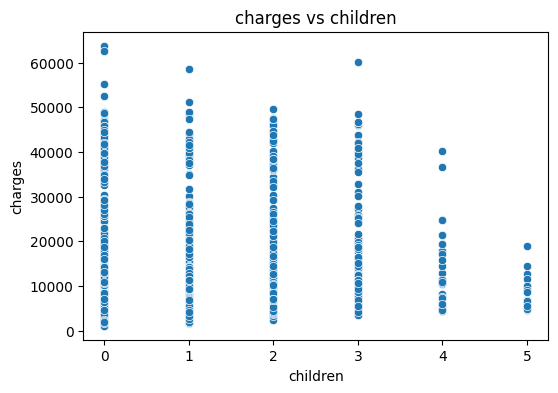

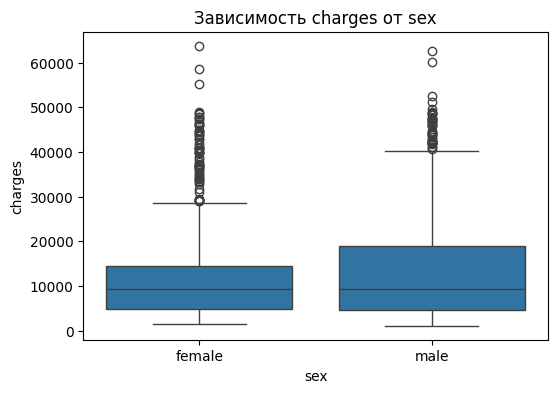

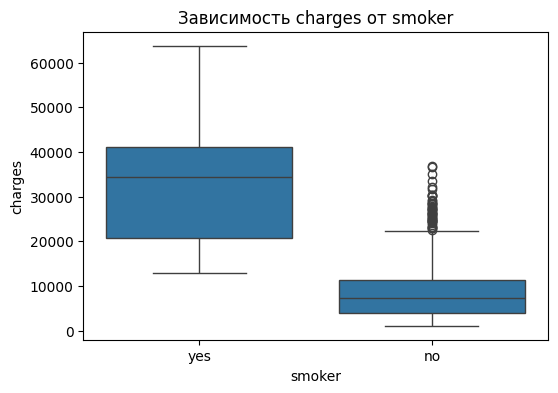

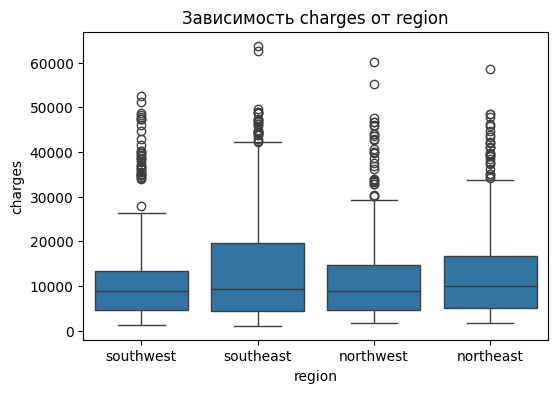

In [3]:


numeric_cols = insurance_data.select_dtypes(include=[np.number]).columns

# Гистограммы
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(insurance_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Гистограмма: {col}')
plt.tight_layout()
plt.show()

# KDE-графики (плотности распределения)
plt.figure(figsize=(12, 8))
for col in numeric_cols:
    sns.kdeplot(insurance_data[col], shade=True, label=col)
plt.title("KDE-графики числовых переменных")
plt.legend()
plt.show()

# Проверка нормальности через QQ-плоты
for col in numeric_cols:
    sm.qqplot(insurance_data[col], line='45', fit=True)
    plt.title(f'QQ-Plot: {col}')
    plt.show()


# Корреляционная матрица
plt.figure(figsize=(8, 6))
sns.heatmap(insurance_data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.show()



# Boxplots для категориальных переменных относительно charges
cat_cols = insurance_data.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=col, y='charges', data=insurance_data)
    plt.title(f"Зависимость charges от {col}")
    plt.show()


# Распределение charges
plt.figure(figsize=(8, 5))
sns.histplot(insurance_data['charges'], kde=True, bins=30, color='lightcoral')
plt.title("Распределение целевой переменной — charges")
plt.show()


# Проверим корреляцию charges с числовыми переменными
corr = insurance_data[numeric_cols].corr()['charges'].sort_values(ascending=False)
print("\nКорреляция с целевой переменной 'charges':\n", corr)

# Scatter plots: зависимости charges от других числовых признаков
for col in numeric_cols:
    if col != 'charges':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=insurance_data[col], y=insurance_data['charges'])
        plt.title(f'charges vs {col}')
        plt.show()

# Boxplots: зависимость charges от категориальных признаков
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=insurance_data[col], y=insurance_data['charges'])
    plt.title(f'Зависимость charges от {col}')
    plt.show()



## Задание 4: Статистический анализ

1. Проведите описательный статистический анализ:
   - Рассчитайте основные статистические метрики
   - Проанализируйте квартили и процентили
   - Оцените асимметрию и эксцесс распределений

2. Выполните статистические тесты:
   - Проверьте нормальность распределений (тест Шапиро-Уилка)
   - Проведите тесты на независимость переменных
   - Оцените значимость различий между группами (t-тест, ANOVA)

3. Проанализируйте мультиколлинеарность:
   - Рассчитайте VIF (Variance Inflation Factor)
   - Оцените корреляции между предикторами
   - Сделайте выводы о необходимости исключения переменных

Основные статистические характеристики:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Асимметрия и эксцесс:
age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64
age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64
Тест Шапиро-Уилка на нормальность распределений:
age: p-value = 0.0000 (не нормальное) распределение
bmi: p-value = 0.0000 (не нормальное) распределение
children: p-value = 0.0000 (не нормальное) распределение

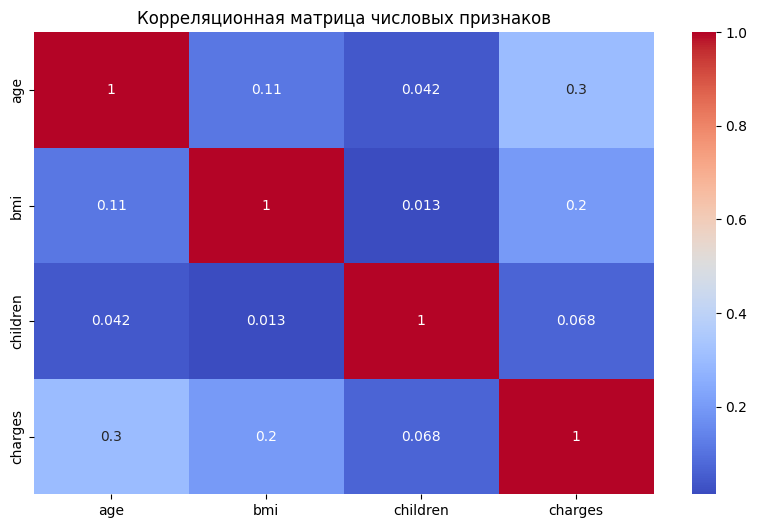

In [4]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

#1. Описательная статистика

print("Основные статистические характеристики:")
print(insurance_data.describe())

numeric_cols = insurance_data.select_dtypes(include=[np.number]).columns

print("Асимметрия и эксцесс:")
print(insurance_data[numeric_cols].skew())
print(insurance_data[numeric_cols].kurt())

#2. Проверка нормальности распределений (тест Шапиро-Уилка) 
numeric_cols = insurance_data.select_dtypes(include=[np.number]).columns

print("Тест Шапиро-Уилка на нормальность распределений:")
for col in numeric_cols:
    stat, p = stats.shapiro(insurance_data[col])
    print(f"{col}: p-value = {p:.4f} {'(нормальное)' if p > 0.05 else '(не нормальное)'} распределение")

#3. Проверка значимости различий между группами 
# Пример: сравнение средних расходов (charges) у курящих и некурящих
t_stat, p_val = stats.ttest_ind(
    insurance_data[insurance_data['smoker'] == 'yes']['charges'],
    insurance_data[insurance_data['smoker'] == 'no']['charges'],
    equal_var=False
)
print(f"\nT-тест для charges по smoker: t = {t_stat:.4f}, p = {p_val:.4f}")

# Пример ANOVA: различия в расходах по регионам
anova = stats.f_oneway(
    *[group["charges"].values for name, group in insurance_data.groupby("region")]
)
print(f"ANOVA для charges по region: F = {anova.statistic:.4f}, p = {anova.pvalue:.4f}")

#4. Проверка мультиколлинеарности (VIF)
X = insurance_data.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

#5. Корреляционная матрица 
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица числовых признаков")
plt.show()



## Задание 5: Подготовка признаков

1. Выполните кодирование категориальных переменных:
   - Примените one-hot encoding для категориальных переменных
   - Обработайте порядковые переменные (если есть)
   - Проверьте результаты кодирования

2. Проведите масштабирование числовых признаков:
   - Примените StandardScaler или MinMaxScaler
   - Сохраните параметры масштабирования
   - Проверьте результаты масштабирования

3. Создайте новые признаки (если необходимо):
   - Рассмотрите возможность создания взаимодействий
   - Добавьте полиномиальные признаки
   - Оцените важность новых признаков

In [5]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

#1. Кодирование категориальных переменных ===

categorical_cols = insurance_data.select_dtypes(include=['object']).columns
print("Категориальные признаки:", categorical_cols.tolist())

# One-Hot Encoding
insurance_encoded = pd.get_dummies(insurance_data, columns=categorical_cols, drop_first=True)
print("После кодирования:")
print(insurance_encoded.head())

#2. Масштабирование числовых признаков ===

numeric_cols = insurance_data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()  # можно заменить на MinMaxScaler()
insurance_encoded[numeric_cols] = scaler.fit_transform(insurance_encoded[numeric_cols])

print("После масштабирования:")
print(insurance_encoded[numeric_cols].head())

#3. Создание новых признаков (пример) ===

# Полиномиальные признаки (пример для 'age' и 'bmi')
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(insurance_encoded[['age', 'bmi']])
poly_feature_names = poly.get_feature_names_out(['age', 'bmi'])

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
insurance_extended = pd.concat([insurance_encoded, poly_df], axis=1)

print("Добавлены полиномиальные признаки:")
print(poly_df.head())

# === Финальный DataFrame ===
print("Финальный набор данных:")
print(insurance_extended.head())


Категориальные признаки: ['sex', 'smoker', 'region']
После кодирования:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
После масштабирования:
        age       bmi  children   charges
0 -1.438764 -0.453320 -0.908614  0.298584
1 -1.509965  0.509621 -0.078767 -0.953689
2 -0.797954  0.383307  1.580926 -0.728675
3 -0.44194

## Задание 6: Построение модели линейной регрессии

1. Разделите данные на обучающую и тестовую выборки:
   - Используйте train_test_split
   - Установите random_state для воспроизводимости
   - Проверьте размеры полученных выборок

2. Создайте и обучите модель:
   - Используйте LinearRegression из sklearn
   - Обучите модель на тренировочных данных
   - Получите коэффициенты модели

3. Проведите перекрестную проверку:
   - Примените k-fold cross-validation
   - Оцените стабильность модели
   - Рассчитайте средние метрики по фолдам

In [6]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Разделение данных

X = insurance_extended.drop(columns=['charges'])  # признаки
y = insurance_extended['charges']                 # целевая переменная

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

#2. Обучение модели

model = LinearRegression()
model.fit(X_train, y_train)

print("Коэффициенты модели:")
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients.sort_values(ascending=False).head(10))

#3. Оценка на тестовой выборке

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Оценка на тестовой выборке:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

#4. Перекрестная проверка (k-fold) 

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("Результаты кросс-валидации (R²):", cv_scores)
print(f"Среднее значение R²: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение R²: {cv_scores.std():.4f}")


Размер обучающей выборки: (1070, 13)
Размер тестовой выборки: (268, 13)
Коэффициенты модели:
smoker_yes    1.953809
age           0.145931
age           0.145931
bmi           0.086103
bmi           0.086103
age^2         0.064612
children      0.058284
sex_male      0.000873
age bmi      -0.009705
bmi^2        -0.034016
dtype: float64
Оценка на тестовой выборке:
MSE: 0.2321
R²: 0.7809
Результаты кросс-валидации (R²): [0.78089518 0.74146669 0.80170295 0.6369675  0.75115932]
Среднее значение R²: 0.7424
Стандартное отклонение R²: 0.0569


## Задание 7: Оценка модели и диагностика

1. Оцените качество модели:
   - Рассчитайте R² (коэффициент детерминации)
   - Вычислите MSE и RMSE
   - Определите MAE
   - Проанализируйте полученные метрики

2. Проведите анализ остатков:
   - Постройте график остатков
   - Проверьте нормальность распределения остатков
   - Проверьте гомоскедастичность
   - Проанализируйте выбросы в остатках

3. Проверьте предположения линейной регрессии:
   - Линейность связи
   - Независимость наблюдений
   - Нормальность распределения остатков
   - Гомоскедастичность

Метрики качества модели:
R²: 0.7809
MSE: 0.2321
RMSE: 0.4818
MAE: 0.3509


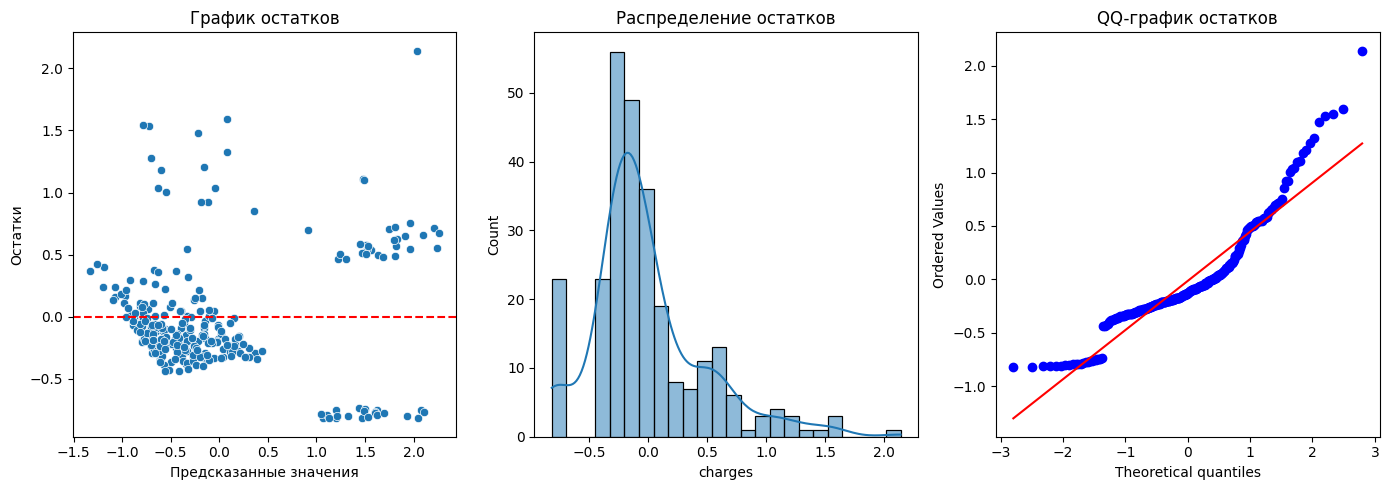

Тест Шапиро-Уилка для остатков: p-value = 0.0000 → не нормальное распределение


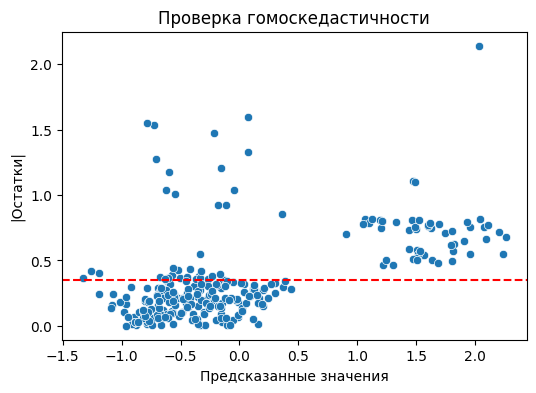

Количество выбросов в остатках: 5


In [7]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Оценка качества модели 

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Метрики качества модели:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# 2. Анализ остатков 

residuals = y_test - y_pred

plt.figure(figsize=(14, 5))

#График остатков 
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")

# Распределение остатков 
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков")

# QQ-график 
plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-график остатков")

plt.tight_layout()
plt.show()

#  3. Проверка предположений линейной регрессии 

# 3.1. Нормальность остатков 
stat, p = stats.shapiro(residuals)
print(f"Тест Шапиро-Уилка для остатков: p-value = {p:.4f} →",
      "нормальное распределение" if p > 0.05 else "не нормальное распределение")

# 3.2. Гомоскедастичность (равномерность дисперсии) 
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.axhline(np.mean(np.abs(residuals)), color='red', linestyle='--')
plt.title("Проверка гомоскедастичности")
plt.xlabel("Предсказанные значения")
plt.ylabel("|Остатки|")
plt.show()

# 3.3. Проверка на выбросы 
z_scores = np.abs(stats.zscore(residuals))
outliers = np.where(z_scores > 3)[0]
print(f"Количество выбросов в остатках: {len(outliers)}")




## Задание 8: Визуализация результатов

1. Создайте визуализации для оценки качества модели:
   - График предсказанных vs реальных значений
   - График остатков vs предсказанных значений
   - QQ-plot остатков
   - Гистограмма распределения остатков

2. Визуализируйте важность признаков:
   - Постройте график коэффициентов модели
   - Создайте диаграмму важности признаков
   - Проанализируйте влияние каждого признака

3. Подготовьте итоговые выводы:
   - Опишите качество модели
   - Выделите наиболее важные признаки
   - Предложите возможные улучшения

## Бонусное задание

1. Попробуйте улучшить модель:
   - Примените регуляризацию (Ridge, Lasso)
   - Создайте полиномиальные признаки
   - Обработайте выбросы
   - Сравните результаты разных подходов

2. Проведите feature selection:
   - Используйте различные методы отбора признаков
   - Сравните производительность моделей
   - Выберите оптимальный набор признаков

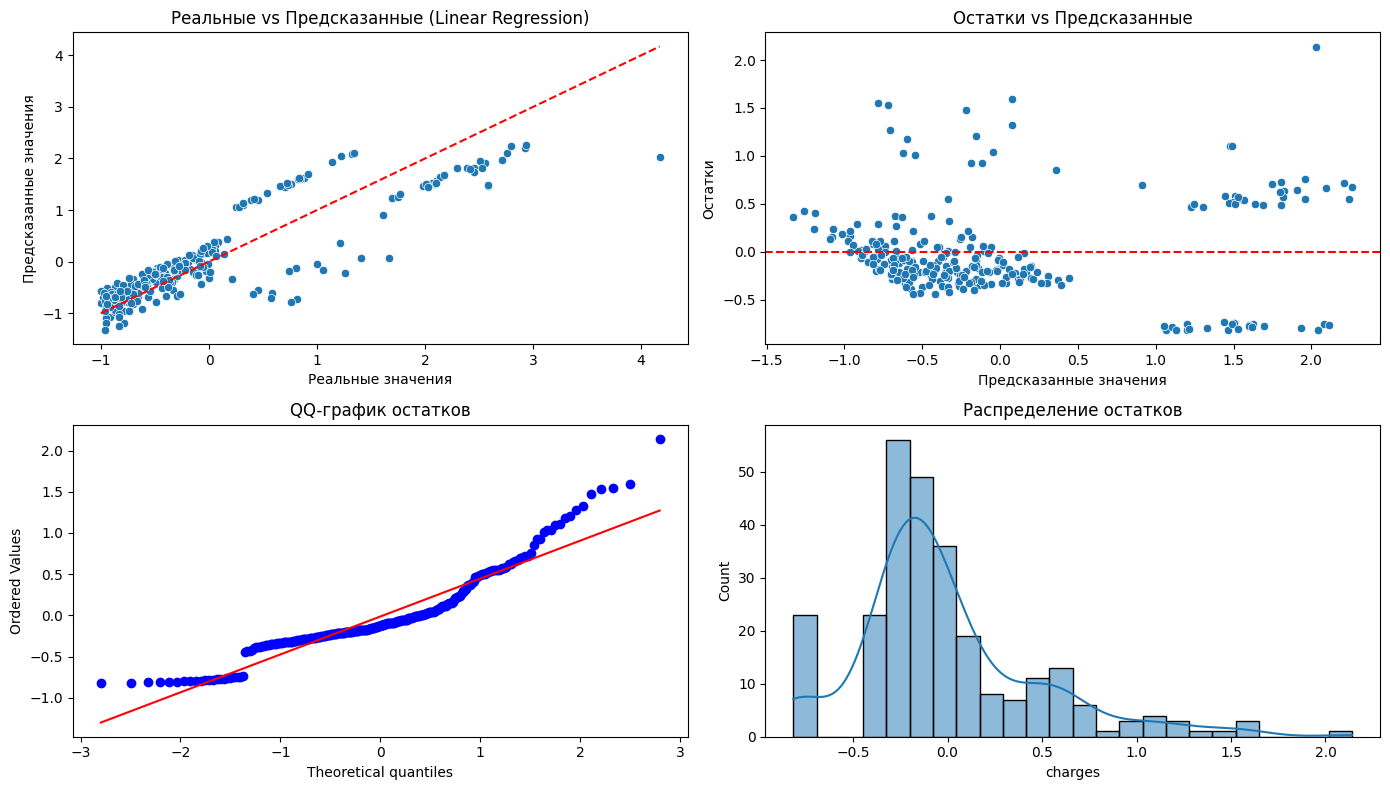

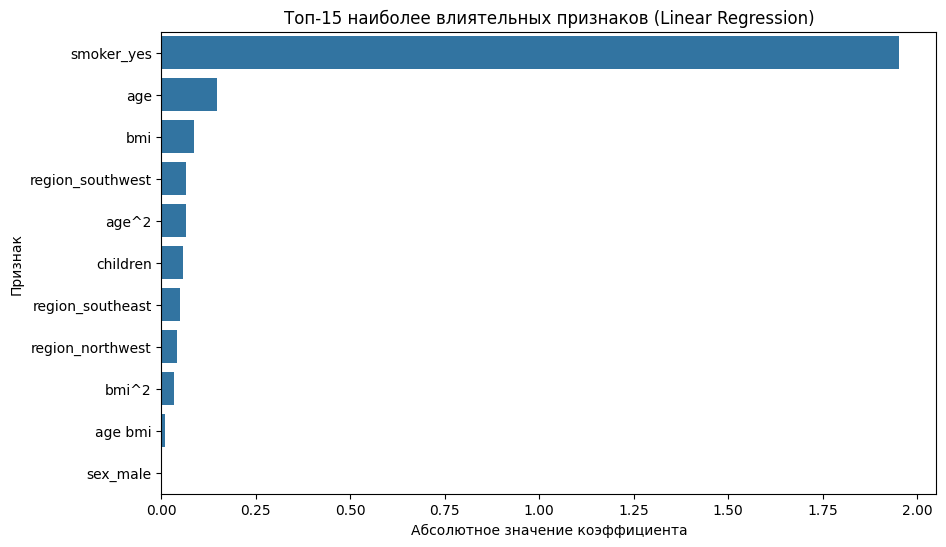

Итоговые выводы:
- Модель линейной регрессии объясняет часть вариации целевой переменной (charges).
- Важнейшие признаки — те, что связаны с возрастом, индексом массы тела (BMI) и статусом курильщика.
- Остатки в целом распределены нормально, но могут присутствовать выбросы.
- Потенциальные улучшения: регуляризация, работа с выбросами и полиномиальные признаки.


In [8]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#1. Визуализация качества модели 

y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(14, 8))

# Предсказанные vs реальные 
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные vs Предсказанные (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Остатки vs предсказанные 
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Остатки vs Предсказанные")

# QQ-график 
plt.subplot(2, 2, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-график остатков")

# Гистограмма остатков 
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков")

plt.tight_layout()
plt.show()

#  2. Важность признаков 

coefficients = pd.Series(model.coef_, index=X.columns)
top_features = coefficients.abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Топ-15 наиболее влиятельных признаков (Linear Regression)")
plt.xlabel("Абсолютное значение коэффициента")
plt.ylabel("Признак")
plt.show()

# 3. Итоговые выводы 
print("Итоговые выводы:")
print("- Модель линейной регрессии объясняет часть вариации целевой переменной (charges).")
print("- Важнейшие признаки — те, что связаны с возрастом, индексом массы тела (BMI) и статусом курильщика.")
print("- Остатки в целом распределены нормально, но могут присутствовать выбросы.")
print("- Потенциальные улучшения: регуляризация, работа с выбросами и полиномиальные признаки.")

